In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in the CSV files
data_2011 = pd.read_csv('Resources/11zpallagi.csv')


In [3]:
#explore headers
data_2011.head(2)

,STATEFIPS,STATE,ZIPCODE,agi_stub,N1,MARS2,PREP,N2,NUMDEP,A00100,...,N09600,A09600,N06500,A06500,N10300,A10300,N11901,A11901,N11902,A11902
0,1,AL,0,1,937299.0,136038.0,547355.0,1602192.0,644217.0,12086376.0,...,157.0,18.0,281321.0,177828.0,406030.0,329354.0,61257.0,40871.0,829761.0,2196173.0
1,1,AL,0,2,495266.0,163878.0,294584.0,1060682.0,402748.0,17752967.0,...,96.0,23.0,368302.0,857023.0,387527.0,939484.0,62697.0,87219.0,424697.0,1233227.0


In [4]:
#Filter headers
data_2011 = data_2011[['STATE','ZIPCODE','MARS2','NUMDEP','A00650','A04470','A18425','A00200']]


In [5]:
data_2011.head(2)

,STATE,ZIPCODE,MARS2,NUMDEP,A00650,A04470,A18425,A00200
0,AL,0,136038.0,644217.0,61464.0,942223.0,29197.0,9305221.0
1,AL,0,163878.0,402748.0,75968.0,1969326.0,163841.0,14511884.0


In [6]:
#Rename headers
renamed_2011 = data_2011.rename(columns={'MARS2':'Joint Returns','NUMDEP':'Dependents','A00650': 'Qualified Dividends','A04470': 'Total Itemized Deductions','A18425': 'State & Local Tax Amount','A00200':'Salaries & Wages Amount'})


In [7]:
renamed_2011.head(2)

,STATE,ZIPCODE,Joint Returns,Dependents,Qualified Dividends,Total Itemized Deductions,State & Local Tax Amount,Salaries & Wages Amount
0,AL,0,136038.0,644217.0,61464.0,942223.0,29197.0,9305221.0
1,AL,0,163878.0,402748.0,75968.0,1969326.0,163841.0,14511884.0


In [8]:
#Change index to state and zipcode
index_2011 = renamed_2011.set_index(['STATE', 'ZIPCODE'])


In [9]:
index_2011.head(2)

Joint Returns  Dependents  Qualified Dividends  \
STATE ZIPCODE                                                   
AL    0             136038.0    644217.0              61464.0   
      0             163878.0    402748.0              75968.0   

               Total Itemized Deductions  State & Local Tax Amount  \
STATE ZIPCODE                                                        
AL    0                         942223.0                   29197.0   
      0                        1969326.0                  163841.0   

               Salaries & Wages Amount  
STATE ZIPCODE                           
AL    0                      9305221.0  
      0                     14511884.0

In [10]:
#Filter to only show New York
ny_2011 = index_2011.loc[['NY']]


In [11]:
#drop '0' and '99999' zipcodes
clean_ny11 = ny_2011.drop(['0','99999'], level='ZIPCODE')
clean_ny11 = clean_ny11.dropna()
clean_ny11 = clean_ny11[clean_ny11.Dependents != 0]


In [12]:
clean_ny11.head(2)

Joint Returns  Dependents  Qualified Dividends  \
STATE ZIPCODE                                                   
NY    10001            383.0      1078.0                992.0   
      10001            273.0       695.0               1253.0   

               Total Itemized Deductions  State & Local Tax Amount  \
STATE ZIPCODE                                                        
NY    10001                       6936.0                     518.0   
      10001                       9716.0                    1758.0   

               Salaries & Wages Amount  
STATE ZIPCODE                           
NY    10001                    33282.0  
      10001                    80101.0

In [13]:
#Reset index now that we have filtered data needed
ny11 = clean_ny11.reset_index()


In [14]:
#If we're processing this for the first time, drop the state columns and bin the salaries
if 'STATE' in list(ny11.columns):
    ny11 = ny11.drop(columns=['STATE'])

    bin_array = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 600000000]
    label_array = [1, 2, 3, 4, 5, 6, 7, 8]
    ny11["Salaries & Wages Amount"] = pd.cut(ny11["Salaries & Wages Amount"], bins=bin_array, labels=label_array)
    
ny11.to_csv("ny11_cleaned.csv")
ny11.head(5)

,ZIPCODE,Joint Returns,Dependents,Qualified Dividends,Total Itemized Deductions,State & Local Tax Amount,Salaries & Wages Amount
0,10001,383.0,1078.0,992.0,6936.0,518.0,1
1,10001,273.0,695.0,1253.0,9716.0,1758.0,2
2,10001,208.0,357.0,1236.0,15042.0,4748.0,2
3,10001,181.0,211.0,1404.0,15785.0,7301.0,2
4,10001,460.0,383.0,3264.0,44189.0,23016.0,5


In [15]:
# Assign X (data) and y (target)
X = ny11[['ZIPCODE','Joint Returns','Dependents','Qualified Dividends','Total Itemized Deductions','State & Local Tax Amount']]
y = ny11[['Salaries & Wages Amount']]
print(X.shape, y.shape)

(9218, 6) (9218, 1)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [20]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [21]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

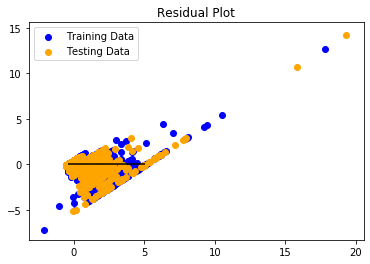

In [22]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.42557841966445414, R2: 0.6682548444985836


In [25]:
#---------WORKING ON DESCISION TREE TESTING BELOW--------

In [24]:
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score

In [25]:
# shuffle rows
#rand11 = ny11.sample(frac=1)

In [26]:
#rand11.head(2)

In [27]:
# split training and testing data
#d_train = rand11[:4638]
#d_test = rand11[4638:] 
#----- instead I will use the X_train and X_test and y_train and y_test from the regression model

In [28]:
#d_train_att = d_train.drop(['Salaries & Wages Amount'], axis=1)
#d_train_gt50 = d_train['Salaries & Wages Amount']

#d_test_att = d_test.drop(['Salaries & Wages Amount'], axis=1)
#d_test_gt50 = d_test['Salaries & Wages Amount']

#d_att = rand11.drop(['Salaries & Wages Amount'], axis=1)
#d_gt50 = rand11['Salaries & Wages Amount']

X_train #what used to be d_train_att
X_test #what used to be d_test_att
y_train #what used to be d_train_gt50
y_test #what used to be d_test_gt50

,Salaries & Wages Amount
4503,1
3026,1
6879,1
3309,1
1790,3
...,...
4840,1
4816,1
7525,1
1971,1


In [29]:
# Fit a decision tree
best_fit_depth = 1
best_fit_accuracy = 0
for i in range(1,20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    t = t.fit(X_train, y_train)
    accuracy = t.score(X_test, y_test)
    print(str(i) + " " + str(accuracy))
    
    if accuracy > best_fit_accuracy:
        best_fit_depth = i
        best_fit_accuracy = accuracy
        
print("Best fit is " + str(best_fit_depth
                          ))
          
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_fit_depth)
t = t.fit(X_train, y_train)

1 0.8095444685466378
2 0.8303687635574837
3 0.86941431670282
4 0.8863340563991323
5 0.8911062906724512
6 0.8989154013015185
7 0.9088937093275488
8 0.9028199566160521
9 0.9049891540130152
10 0.9032537960954446
11 0.9067245119305857
12 0.9032537960954446
13 0.9071583514099784
14 0.9054229934924078
15 0.9049891540130152
16 0.9075921908893709
17 0.9058568329718004
18 0.9067245119305857
19 0.9019522776572668
Best fit is 7


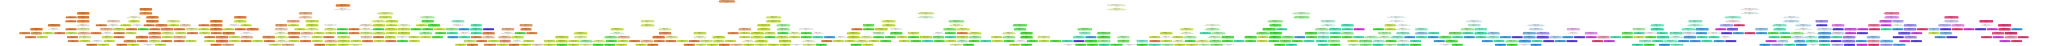

In [32]:
# Visualize tree
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(t, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['1', '2', '3', '4', '5', '6', '7', '8'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [30]:
t.score(X_test, y_test)

0.9093275488069414

In [31]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

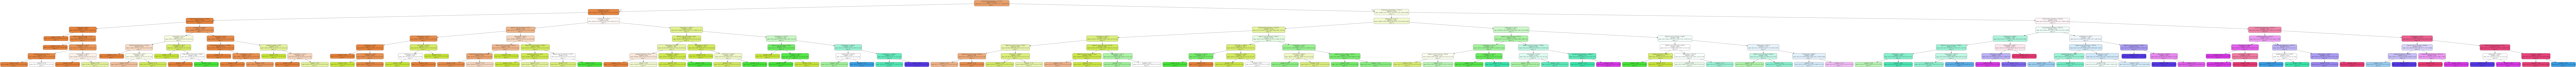

In [32]:
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#--------attempting to work on another type of graph below---------

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(133.3902422993735, 211.4, 'X[4] <= 11382.0\ngini = 0.383\nsamples = 6913\nvalue = [5369, 702, 350, 186, 106, 69, 38, 93]'),
 Text(46.92518645584726, 199.32, 'X[1] <= 571.0\ngini = 0.082\nsamples = 5467\nvalue = [5236, 188, 30, 9, 3, 1, 0, 0]'),
 Text(27.404758353221958, 187.24, 'X[1] <= 418.0\ngini = 0.031\nsamples = 5287\nvalue = [5205, 78, 4, 0, 0, 0, 0, 0]'),
 Text(12.784725536992841, 175.16, 'X[4] <= 9707.0\ngini = 0.014\nsamples = 5090\nvalue = [5055, 34, 1, 0, 0, 0, 0, 0]'),
 Text(6.392362768496421, 163.07999999999998, 'X[2] <= 1105.0\ngini = 0.006\nsamples = 4985\nvalue = [4969, 16, 0, 0, 0, 0, 0, 0]'),
 Text(3.1961813842482103, 151.0, 'X[3] <= 961.0\ngini = 0.002\nsamples = 4918\nvalue = [4914, 4, 0, 0, 0, 0, 0, 0]'),
 Text(1.5980906921241051, 138.92000000000002, 'X[2] <= 981.0\ngini = 0.0\nsamples = 4854\nvalue = [4853, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.7990453460620526, 126.84, 'gini = 0.0\nsamples = 4839\nvalue = [4839, 0, 0, 0, 0, 0, 0, 0]'),
 Text(2.397136038186158, 12

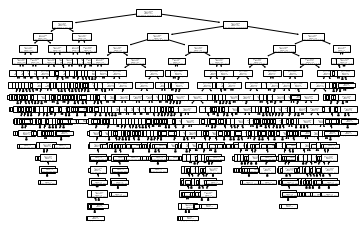

In [37]:
tree.plot_tree(clf.fit(X_train,y_train))